<a href="https://colab.research.google.com/github/Bisalia/Crud_app/blob/main/multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import time
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('segment.csv')
df.head()

,CustomerID,Recency,Tenure,Frequency,MonetaryValue,Segment
0,12346,326,326,2,0.00,Fence Sitter
1,12349,19,19,73,1757.55,Potential
2,12350,310,310,17,334.40,Fence Sitter
3,12353,204,204,4,89.00,Fence Sitter
4,12354,232,232,58,1079.40,Fence Sitter


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3046 non-null   int64  
 1   Recency        3046 non-null   int64  
 2   Tenure         3046 non-null   int64  
 3   Frequency      3046 non-null   int64  
 4   MonetaryValue  3046 non-null   float64
 5   Segment        3046 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 142.9+ KB


In [6]:
df.isnull().sum()

CustomerID       0
Recency          0
Tenure           0
Frequency        0
MonetaryValue    0
Segment          0
dtype: int64

In [9]:
df['CustomerID'].nunique()

3046

In [10]:
df.Segment.value_counts

<bound method IndexOpsMixin.value_counts of 0       Fence Sitter
1          Potential
2       Fence Sitter
3       Fence Sitter
4       Fence Sitter
            ...     
3041    Fence Sitter
3042    Fence Sitter
3043       Potential
3044           Loyal
3045       Potential
Name: Segment, Length: 3046, dtype: object>

In [11]:
df = df.drop(['CustomerID'], axis=1)
df.head()

,Recency,Tenure,Frequency,MonetaryValue,Segment
0,326,326,2,0.00,Fence Sitter
1,19,19,73,1757.55,Potential
2,310,310,17,334.40,Fence Sitter
3,204,204,4,89.00,Fence Sitter
4,232,232,58,1079.40,Fence Sitter


In [13]:
df.describe()

,Recency,Tenure,Frequency,MonetaryValue
count,3046.000000,3046.000000,3046.000000,3046.000000
mean,116.456993,187.826001,58.406106,1074.315536
std,110.032698,119.181634,168.784197,6293.383305
min,1.000000,1.000000,1.000000,-4287.630000
25%,23.000000,73.250000,13.000000,213.877500
50%,71.000000,183.000000,28.000000,415.760000
75%,198.000000,295.000000,62.000000,904.947500
max,374.000000,374.000000,7983.000000,256438.490000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


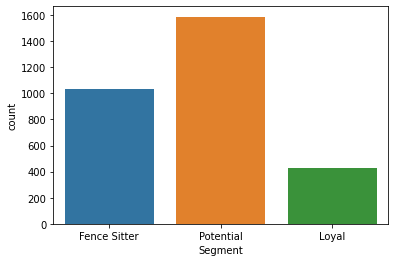

In [15]:
sns.countplot('Segment', data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


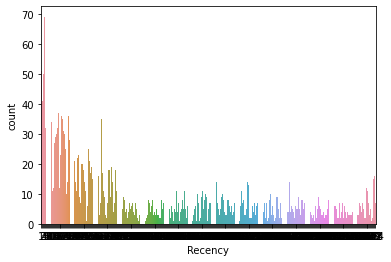

In [21]:
sns.countplot('Recency', data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


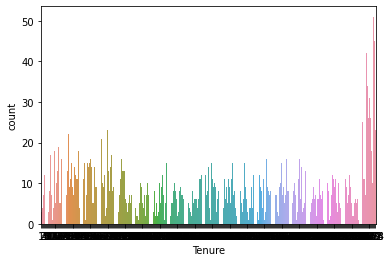

In [19]:
sns.countplot('Tenure', data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


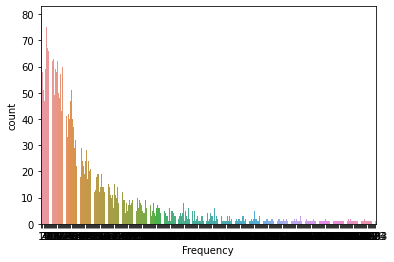

In [22]:
sns.countplot('Frequency', data=df)
plt.show()

<Figure size 1440x1440 with 0 Axes>

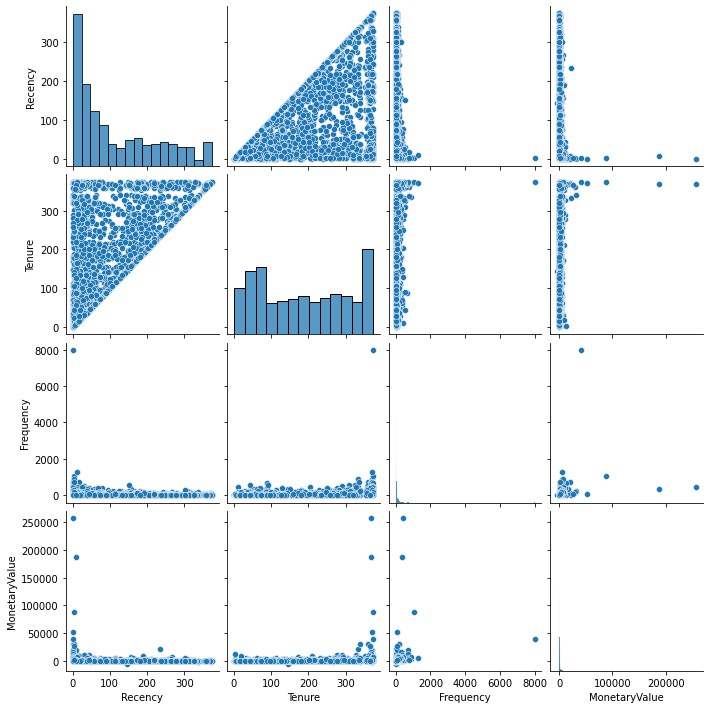

In [23]:
plt.figure(figsize = (20,20))
sns.pairplot(df)
plt.show()

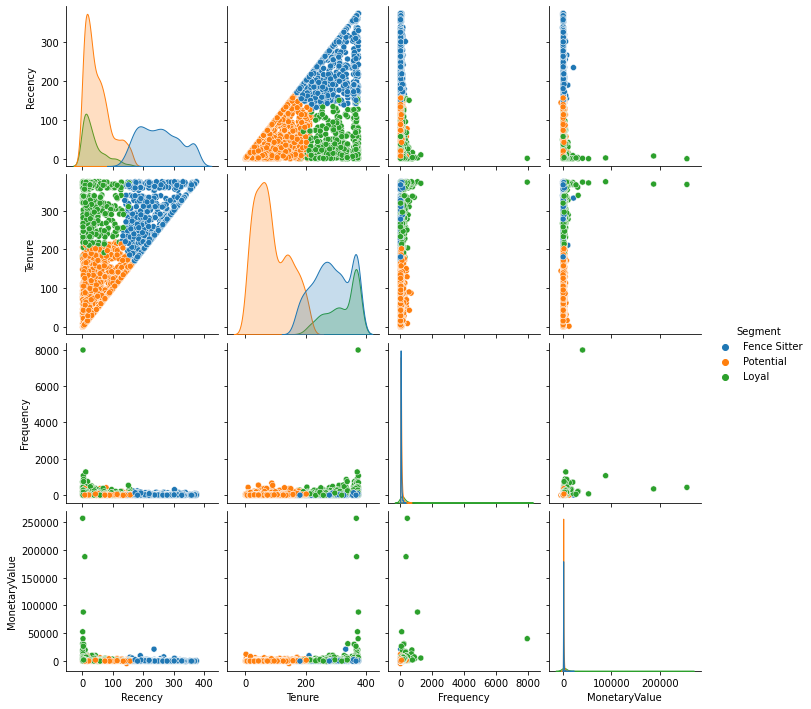

In [24]:
sns.pairplot(df, kind="scatter", hue="Segment")
plt.show()

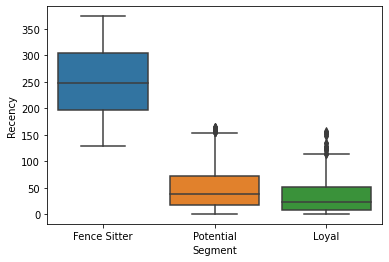

In [26]:
sns.boxplot( x=df["Segment"], y=df["Recency"] )
plt.show()

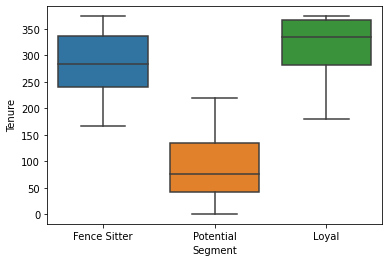

In [27]:
sns.boxplot( x=df["Segment"], y=df["Tenure"])
plt.show()

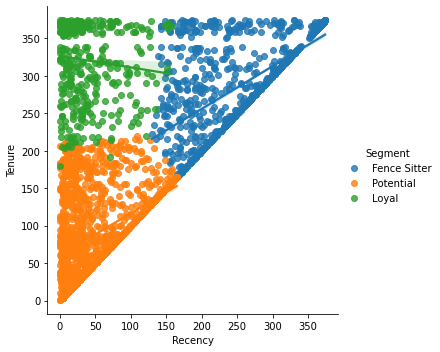

In [28]:
sns.lmplot(x="Recency", y="Tenure", data=df, fit_reg=True, hue='Segment', legend=True)
plt.show()

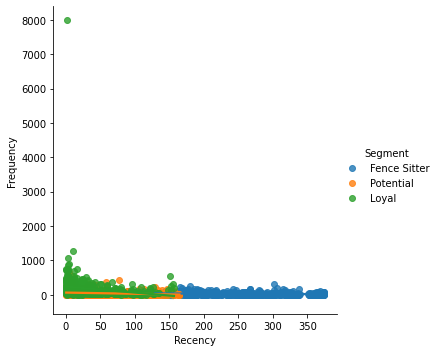

In [29]:
sns.lmplot(x="Recency", y="Frequency", data=df, fit_reg=True, hue='Segment', legend=True)
plt.show()

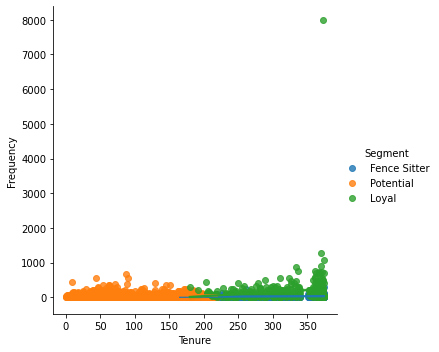

In [30]:
sns.lmplot(x="Tenure", y="Frequency", data=df, fit_reg=True, hue='Segment', legend=True)
plt.show()

In [31]:
numeric_columns = df.select_dtypes(include =['int64','float64'])
numeric_columns.head()

,Recency,Tenure,Frequency,MonetaryValue
0,326,326,2,0.00
1,19,19,73,1757.55
2,310,310,17,334.40
3,204,204,4,89.00
4,232,232,58,1079.40


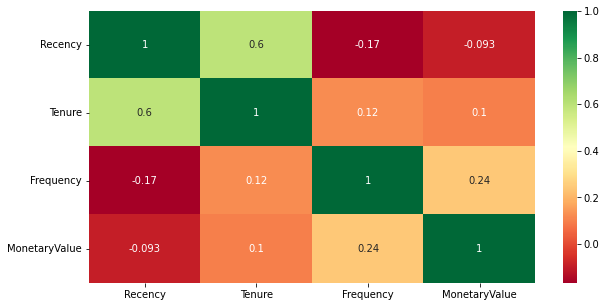

In [32]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [33]:
df['Segment'].value_counts(normalize = True)

Potential       0.521011
Fence Sitter    0.338148
Loyal           0.140840
Name: Segment, dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df.Segment = lb.fit_transform(df.Segment)
df.head()

,Recency,Tenure,Frequency,MonetaryValue,Segment
0,326,326,2,0.00,0
1,19,19,73,1757.55,2
2,310,310,17,334.40,0
3,204,204,4,89.00,0
4,232,232,58,1079.40,0


In [37]:
cols = df.select_dtypes(include=['object'])
cols.head()

""
0
1
2
3
4


In [66]:
X = df.drop(['Segment'], axis = 1).values
y = df['Segment'].values

In [89]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and validation sets
seed = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)


In [90]:
print("Train set", X_train.shape)
print("tTest set", X_test.shape)

Train set (2436, 4)
tTest set (610, 4)


In [92]:
y_train.shape

(2436,)

In [93]:
y_test.shape

(610,)

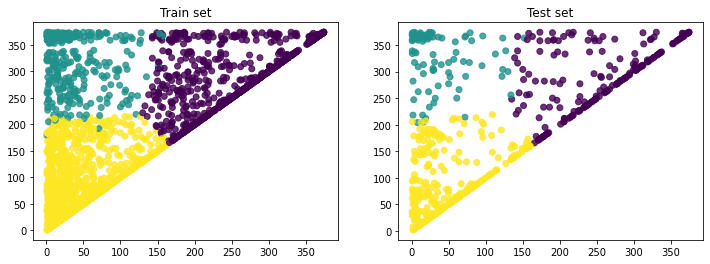

In [94]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.show()




In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparameters = {'C': [0.1, 0.5, 1.0]}

# Create a logistic regression object
logistic_regression = LogisticRegression()

# Create a grid search object
grid_search =GridSearchCV(LogisticRegression(), hyperparameters, scoring="roc_auc", cv=5)

# Train the model using the grid search object
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_)


{'C': 0.1}


#OneVsRest


In [162]:
from sklearn.metrics import accuracy_score
start_time = time.time()
ovr = OneVsRestClassifier(grid_search)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)
one_vs_rest_log = accuracy_score(y_test, y_pred)
one_vs_rest_log_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_log)
print("Time of traini", one_vs_rest_log_time)

Accuracy_score:  0.9836065573770492
Time of traini 0.6366751194000244


#OneVsOne


In [161]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
start_time = time.time()
ovo = OneVsOneClassifier(grid_search)
ovo.fit(X_train, y_train)
y_pred = ovo.predict(X_test)
one_vs_one_log = accuracy_score(y_test, y_pred)
one_vs_one_log_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_log)
print("Time of train", one_vs_one_log_time)

Accuracy_score:  0.9852459016393442
Time of train 0.4452817440032959


#OutputCode

In [160]:
from sklearn.multiclass import OutputCodeClassifier
start_time = time.time()
out_put = OutputCodeClassifier(grid_search)
out_put.fit(X_train, y_train)
y_pred_outpc = out_put.predict(X_test)
output_lg = accuracy_score(y_test, y_pred_outpc)
output_lg_time = time.time() - start_time
print("Accuracy_score: ", output_lg)
print("Time of train", output_lg_time)

Accuracy_score:  0.9737704918032787
Time of train 0.6920552253723145


#svm


In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model and the hyperparameters to search over
model = SVC()
parameters = {'kernel': ['rbf'], 'gamma':[0.1, 0.01, 0.001, 0.00023] , 'C': [0.1, 1, 5, 50, 500]}

# Use GridSearchCV to perform a cross-validation procedure
grid_svc = GridSearchCV(model, parameters, cv=5, scoring='roc_auc')

# Fit the model using the training data
grid_svc.fit(X_train, y_train)

# Print the best hyperparameters found
print(grid_svc.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


#OneVsRest for svm

In [159]:
start_time = time.time()
ovr_svc= OneVsRestClassifier(grid_svc)
ovr_svc.fit(X_train, y_train)
y_pred_svc=ovr_svc.predict(X_test)
ovr_acc_svc= accuracy_score(y_test, y_pred_svc)
ovr_svc_time = time.time() - start_time
print("Accuracy_score: ", ovr_acc_svc)
print("Time of train", ovr_svc_time)


Accuracy_score:  0.9934426229508196
Time of train 21.04851984977722


#OneVsOne for svm

In [158]:
start_time = time.time()
ovo_svc= OneVsOneClassifier(grid_svc)
ovo_svc.fit(X_train, y_train)
y_pred_ovo=ovo_svc.predict(X_test)
one_svc= accuracy_score(y_test, y_pred_ovo)
one_svc_time = time.time() - start_time
print("Accuracy_score: ", one_svc)
print("Time of train", one_svc_time)

Accuracy_score:  0.9852459016393442
Time of train 11.126611232757568


#OutputCode for svm

In [240]:
start_time = time.time()
outpc_svc = OutputCodeClassifier(grid_svc)
outpc_svc.fit(X_train, y_train)
y_pred_outpc_svc = outpc_svc.predict(X_test)
output_svm = accuracy_score(y_test, y_pred_outpc_svc)
output_svc_time = time.time() - start_time
print("Accuracy_score: ", output_svm)
print("Time of training", output_svc_time)

Accuracy_score:  0.9868852459016394
Time of training 16.776721954345703


#KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with k=5 and the Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [169]:
param_grid_knn = {
    'n_neighbors': np.arange(1, 20, 2),
    'metric': ['euclidean', 'manhattan']
}

In [170]:
# Create a GridSearchCV object and fit it to the data
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [172]:
# Print the best hyperparameters found by GridSearchCV
print(grid_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 11}


In [173]:
# Create a new KNN model with the best hyperparameters and fit it to the data
best_knn = KNeighborsClassifier(**grid_knn.best_params_)
best_knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9852459016393442


#OneVsRest knn

In [179]:
start_time = time.time()
ovr_knn = OneVsRestClassifier(grid_knn)
ovr_knn.fit(X_train, y_train)
y_pred_knn = ovr_knn.predict(X_test)
one_vs_rest_knn = accuracy_score(y_test, y_pred_knn)
one_vs_rest_knn_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_knn)
print("Time of training", one_vs_rest_knn_time)

Accuracy_score:  0.9836065573770492
Time of training 6.1657209396362305


#OneVsOne KNN

In [178]:
start_time = time.time()
ovo_knn = OneVsOneClassifier(grid_knn)
ovo_knn.fit(X_train, y_train)
y_pred = ovo_knn.predict(X_test)
one_vs_one_knn = accuracy_score(y_test, y_pred)
one_vs_one_knn_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_knn)
print("Time of training", one_vs_one_knn_time)

Accuracy_score:  0.978688524590164
Time of training 4.327707290649414


In [181]:
start_time = time.time()
outpc_knn = OutputCodeClassifier(grid_knn)
outpc_knn.fit(X_train, y_train)
y_pred_opc_knn = outpc_knn.predict(X_test)
output_knn = accuracy_score(y_test, y_pred_opc_knn)
output_knn_time = time.time() - start_time
print("Accuracy_score: ", output_knn)
print("Time of training", output_knn_time)

Accuracy_score:  0.9836065573770492
Time of training 4.0625574588775635


#Naive bayes

In [215]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


In [216]:
# create the model
model = GaussianNB()

# fit the model to the training data
model.fit(X_train, y_train)


GaussianNB()

In [217]:
# define the parameters for the grid search
# define the parameters for the grid search
parameters = {'priors': [None, [0.25, 0.75, 0.1, 0.05, 0.05]],
              'var_smoothing': [1e-9, 1e-8, 1e-7]}

In [218]:
# create the grid search object
grid_nb = GridSearchCV(model, parameters, scoring='roc_auc')

# fit the model to the training data
grid_nb.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None, [0.25, 0.75, 0.1, 0.05, 0.05]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='roc_auc')

In [219]:
# view the best parameters
grid_nb.best_params_


{'priors': None, 'var_smoothing': 1e-09}

In [220]:
# get the best model
best_model = grid_nb.best_estimator_

# make predictions on the test data
predictions = best_model.predict(X_test)

In [206]:
# evaluate the model performance
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, average='micro')
recall = metrics.recall_score(y_test, predictions, average='micro')
f1 = metrics.f1_score(y_test, predictions, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9327868852459016
Precision: 0.9327868852459016
Recall: 0.9327868852459016
F1 score: 0.9327868852459016


OneVSRest Naives bayes

In [221]:
start_time = time.time()
ovr_nb = OneVsRestClassifier(grid_nb)
ovr_nb.fit(X_train, y_train)
y_pred = ovr_nb.predict(X_test)
one_vs_rest_nb = accuracy_score(y_test, y_pred)
one_vs_rest_nb_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_nb)
print("Time of training", one_vs_rest_nb_time)

Accuracy_score:  0.9229508196721311
Time of training 0.23762941360473633


oneVsOne Naives bayes

In [222]:
start_time = time.time()
ovo_nb = OneVsOneClassifier(grid_nb)
ovo_nb.fit(X_train, y_train)
y_pred = ovo_nb.predict(X_test)
one_vs_one_nb = accuracy_score(y_test, y_pred)
one_vs_one_nb_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_nb)
print("Training", one_vs_one_nb_time)

Accuracy_score:  0.9327868852459016
Training 0.22250699996948242


OutputCode Naives Bayes

In [223]:
start_time = time.time()
outpc_nb = OutputCodeClassifier(grid_nb)
outpc_nb.fit(X_train, y_train)
y_pred_outpc_nb = outpc_nb.predict(X_test)
output_nb = accuracy_score(y_test, y_pred_outpc_nb)
output_nb_time = time.time() - start_time
print("Accuracy_score: ", output_nb)
print("Time of Training", output_nb_time)

Accuracy_score:  0.9229508196721311
Time of Training 0.23184823989868164


#Decision Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
# create the model
model_dt = DecisionTreeClassifier()

# fit the model to the training data
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [227]:
# define the parameters for the grid search
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}


In [229]:
# create the grid search object
grid_dt = GridSearchCV(model_dt, parameters, scoring='accuracy')

# fit the model to the training data
grid_dt.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [230]:

# evaluate the model performance
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, average='micro')
recall = metrics.recall_score(y_test, predictions, average='micro')
f1 = metrics.f1_score(y_test, predictions, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9327868852459016
Precision: 0.9327868852459016
Recall: 0.9327868852459016
F1 score: 0.9327868852459016


OneVsRest Decision Tree

In [237]:
start_time = time.time()
ovr_nb = OneVsRestClassifier(grid_nb)
ovr_nb.fit(X_train, y_train)
y_pred = ovr_nb.predict(X_test)
one_vs_rest_dt = accuracy_score(y_test, y_pred)
one_vs_rest_dt_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_nb)
print("Time of Training", one_vs_rest_nb_time)

Accuracy_score:  0.9229508196721311
Time of Training 0.21451735496520996


OneVsOne Decision Tree

In [234]:
start_time = time.time()
ovo_dt = OneVsOneClassifier(grid_dt)
ovo_dt.fit(X_train, y_train)
y_pred_ovo = ovo_dt.predict(X_test)
one_vs_one_dt = accuracy_score(y_test, y_pred)
one_vs_one_dt_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_dt)
print("Time of Training", one_vs_one_dt_time)

Accuracy_score:  0.9327868852459016
Time of Training 0.8187916278839111


OutputCode Decision Tree

In [235]:
start_time = time.time()
outpc_dt = OutputCodeClassifier(grid_dt)
outpc_dt.fit(X_train, y_train)
y_pred_outpc_dt = outpc_dt.predict(X_test)
output_dt = accuracy_score(y_test, y_pred_outpc_nb)
output_dt_time = time.time() - start_time
print("Accuracy_score: ", output_dt)
print("Time of training", output_dt_time)

Accuracy_score:  0.9229508196721311
Time of training 2.1054067611694336


#compararison of models

In [241]:
data = {'OVR': [one_vs_rest_log, ovr_acc_svc, one_vs_rest_knn, one_vs_rest_nb, one_vs_rest_dt],
        'OVR-Time': [one_vs_rest_log_time, ovr_svc_time, one_vs_rest_knn_time, one_vs_rest_nb_time, one_vs_rest_dt_time],
        'OVO': [one_vs_one_log, ovo_svc, one_vs_one_knn, one_vs_one_nb, one_vs_one_dt],
        'OVO-Time': [one_vs_one_log_time, one_svc_time, one_vs_one_knn_time, one_vs_one_nb_time, one_vs_one_dt_time],
        'OUTPC': [output_lg, outpc_svc, output_knn, output_nb, output_dt],
        'OUTPC-Time': [output_lg_time, output_svc_time, output_knn_time, output_nb_time, output_dt_time]
       }

In [243]:
#let creates DataFrame.
result = pd.DataFrame(data, index=['Linear-Regression',
                               'stands for Support Vector Classification',
                               'K-Nearest-Neghbor',
                               'Naive-Bayes',
                               'Dicision-Tree'])


result

,OVR,OVR-Time,OVO,OVO-Time,OUTPC,OUTPC-Time
Linear-Regression,0.983607,0.636675,0.985246,0.445282,0.97377,0.692055
stands for Support Vector Classification,0.993443,21.048520,OneVsOneClassifier(estimator=GridSearchCV(cv=5...,11.126611,OutputCodeClassifier(estimator=GridSearchCV(cv...,16.776722
K-Nearest-Neghbor,0.983607,6.165721,0.978689,4.327707,0.983607,4.062557
Naive-Bayes,0.922951,0.214517,0.932787,0.208531,0.922951,0.231848
Dicision-Tree,0.922951,0.380143,0.932787,0.818792,0.922951,2.105407


#Multiple output classifier

In [244]:
Mult_x = df.drop(columns=['Tenure','Frequency'])
Mult_y = df[['Tenure','Frequency']]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(Mult_x, Mult_y, test_size=0.2, random_state=13)

Regression with multiple outputs

In [246]:
from sklearn.linear_model import Ridge
ridge_param = {'alpha': np.arange(0, 2, 0.1)} 

grid_param= GridSearchCV(Ridge(),
                      ridge_param,
                      scoring='r2',
                      cv = 3)

In [247]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.metrics import r2_score

multioutputReg = MultiOutputRegressor(grid_param)
start_time = time.time()
multioutputReg.fit(X_train, y_train)
end_time = time.time() - start_time

multioutputResult = multioutputReg.predict(X_train)
r2_score = r2_score(y_train, multioutputResult)
print("MultiOutputRegressor\n train r2: ", r2_score, "\n training time: ", end_time)

MultiOutputRegressor
 train r2:  0.36211161190350044 
 training time:  0.5849323272705078


Custom R2 formula

In [250]:
def r2_formul(data_, predicted_data):
    data_ = np.array(data_)
    predicted_data = np.array(predicted_data)
    diff1 = np.subtract(data_, predicted_data)
    squared_diff1 = np.square(diff1)
    diff2 = data_ - data_.mean()
    squared_diff2 = np.square(diff2)
    return 1-squared_diff1.sum()/squared_diff2.sum()

#Chain of regressors

In [251]:
regressor_chaine = RegressorChain(grid_param)
start_time = time.time()
regressor_chaine.fit(X_train, y_train)
end_time = time.time() - start_time

rg_chaine = regressor_chaine.predict(X_train)

# r2_ridge_train_rc = r2_score(y_train, rg_chain)
reg_chaine = r2_formul(y_train, rg_chaine)
print("Regression-Chain")
print("R2 score: ", reg_chaine)
print("Training_time: ", end_time)

Regression-Chain
R2 score:  0.36482158473455406
Training_time:  0.2248060703277588
